# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer


# **Upload Data**

In [ ]:
df =pd.read_csv('/content/titanic_toy.csv')

In [ ]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


# **check Missing value**

In [ ]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

# **Split Data**

In [ ]:
X =df.drop(columns=['Survived'])
y=df['Survived']

# **Train and Test Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

# **Apply Arbitrary imputer**

In [ ]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)


X_train['Fare_99'] = X_train['Age'].fillna(999)
X_train['Fare_minus1'] = X_train['Age'].fillna(-1)

In [ ]:
print('original Age variable variance: ', X_train['Age'].var())
print('Age variable after imputer 99 ', X_train['Age_99'].var())
print('Age avriable after imputer -1 ', X_train['Age_minus1'].var())


print('original Fare variable variance: ', X_train['Fare'].var())
print('Fare variable after imputer 99 ', X_train['Fare_99'].var())
print('Fare avriable after imputer -1 ', X_train['Fare_minus1'].var())


original Age variable variance:  204.34951339046142
Age variable after imputer 99  951.7275570187188
Age avriable after imputer -1  318.0896202624488
original Fare variable variance:  2448.1979137063163
Fare variable after imputer 99  155054.41209691347
Fare avriable after imputer -1  318.0896202624488


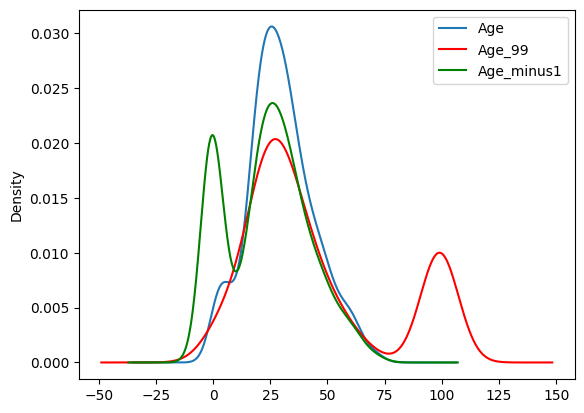

In [ ]:
fig =plt.figure()
ax = fig.add_subplot(111)

#origial variable
X_train['Age'].plot(kind='kde', ax=ax)

#variable imputer in madian
X_train['Age_99'].plot(kind='kde' , ax=ax, color='red')

#variable imputer in mean

X_train['Age_minus1'].plot(kind='kde', ax=ax,color='green')

#add legend
lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, labels, loc='best')

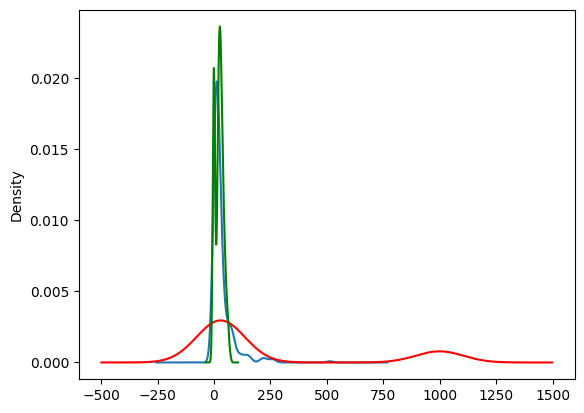

In [ ]:
fig =plt.figure()
ax = fig.add_subplot(111)

#origial variable
X_train['Fare'].plot(kind='kde', ax=ax)

#variable imputer in madian
X_train['Fare_99'].plot(kind='kde' , ax=ax, color='red')

#variable imputer in mean

X_train['Fare_minus1'].plot(kind='kde', ax=ax,color='green')

#add legend
lines, labels = ax.get_legend_handles_labels()

In [ ]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,204.349513,204.349513
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,-2146.736242,125.558364
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,-36.529656,-4.149246
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,11223.095428,-189.535540
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,-4758.161980,318.089620
Fare_99,204.349513,-2146.736242,-36.529656,11223.095428,-4758.161980,155054.412097,-4758.161980
Fare_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,-4758.161980,318.089620


In [ ]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,1.000000,1.000000
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,-0.109742,0.142022
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,-0.056093,-0.140668
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,0.923877,-0.344476
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,-0.677520,1.000000
Fare_99,1.000000,-0.109742,-0.056093,0.923877,-0.677520,1.000000,-0.677520
Fare_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,-0.677520,1.000000


# **Using SK-learn**

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
imputer1 =SimpleImputer(strategy='constant',fill_value=99)
imputer2 =SimpleImputer(strategy='constant', fill_value=999)

In [ ]:
trf =ColumnTransformer([
    ('imputer1', imputer1 ,['Age']),
    ('imputer2', imputer2,['Fare'])
],remainder='passthrough')

In [ ]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [ ]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [ ]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [ ]:
X_train =trf.transform(X_train)
X_test =trf.transform(X_test)

In [ ]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])